<a href="https://colab.research.google.com/github/raihanrama/Repo-Data-Cleaning-Python/blob/main/data_analis_coffeshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.IMPORT DATASET**

## 1.1 **Download semua kebutuhan**

In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

## **1.2 Import Dataset**

In [1]:
# ===========================
# IMPORT LIBRARY
# ===========================
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, kurtosis

sns.set()
%matplotlib inline

In [2]:
# ===========================
# LOAD DATASET
# ===========================
file_path = "/content/Coffe_sales.csv"
df = pd.read_csv(file_path, encoding='latin-1')

print("=== Data Loaded ===")
print(f"Jumlah Baris : {df.shape[0]}")
print(f"Jumlah Kolom : {df.shape[1]}")
print("="*40)

=== Data Loaded ===
Jumlah Baris : 3547
Jumlah Kolom : 11


In [3]:
# Ringkasan Awal Dataset
print("\n=== Ringkasan Awal Dataset ===")
print(f"Tipe Data: {type(df)}")
print(f"Ukuran Dataset: {df.size} elemen")
print(f"Apakah ada missing values?: {df.isnull().any().any()}")


=== Ringkasan Awal Dataset ===
Tipe Data: <class 'pandas.core.frame.DataFrame'>
Ukuran Dataset: 39017 elemen
Apakah ada missing values?: False


# **2.EDA**

## **2.1 Melihat Struktur Dataset**

In [4]:
# ===========================
# MELIHAT 5 BARIS DATA PERTAMA
# ===========================
print("\n=== 5 Data Teratas ===")
display(df.head())


=== 5 Data Teratas ===


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [5]:
# ===========================
# MELIHAT INFORMASI MENGENAI DATASET YANG DIGUNAKAN
# ===========================
print("\n=== Info Dataset ===")
df.info()


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [6]:
print("\n=== Statistik Deskriptif (Numerik) ===")
display(df.describe())


=== Statistik Deskriptif (Numerik) ===


,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [7]:
print("\n=== Statistik Deskriptif (Objek) ===")
display(df.describe(include="object"))


=== Statistik Deskriptif (Objek) ===


,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Date,Time
count,3547,3547,3547,3547,3547,3547,3547
unique,1,8,3,7,12,381,3547
top,card,Americano with Milk,Afternoon,Tue,Mar,2024-10-11,18:11:38.635000
freq,3547,809,1205,572,494,26,1


In [8]:
# Tampilkan nama kolom dalam bentuk tabel
df_columns = pd.DataFrame(df.columns.tolist(), columns=['Nama Kolom'])
print("\n=== Nama Kolom (Tabel) ===")
display(df_columns)


=== Nama Kolom (Tabel) ===


,Nama Kolom
0,hour_of_day
1,cash_type
2,money
3,coffee_name
4,Time_of_Day
5,Weekday
6,Month_name
7,Weekdaysort
8,Monthsort
9,Date


In [9]:
print("\n=== Jumlah Nilai Unik Tiap Kolom ===")
print(df.nunique())


=== Jumlah Nilai Unik Tiap Kolom ===
hour_of_day      17
cash_type         1
money            13
coffee_name       8
Time_of_Day       3
Weekday           7
Month_name       12
Weekdaysort       7
Monthsort        12
Date            381
Time           3547
dtype: int64


## **2.2 Melihat Missing Value, Duplikat, dan Nilai Null**

In [10]:
# ===========================
# CEK JUMLAH NILAI DATA NULL PADA DATASET
# ===========================
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values)


=== Missing Values ===
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [11]:
# ===========================
# CEK PRESENTASE NILAI DATA NULL PADA DATASET
# ===========================
print("\n=== Persentase Nilai Null Values ===")
percent_missing = (missing_values / len(df)) * 100
print(percent_missing)


=== Persentase Nilai Null Values ===
hour_of_day    0.0
cash_type      0.0
money          0.0
coffee_name    0.0
Time_of_Day    0.0
Weekday        0.0
Month_name     0.0
Weekdaysort    0.0
Monthsort      0.0
Date           0.0
Time           0.0
dtype: float64


In [12]:
# ===========================
# CEK DUPLIKAT PADA DATASET
# ===========================

print("\n=== Jumlah Data Duplikat ===")
print(df.duplicated().sum())

# Tampilkan baris yang terduplikat
print("\n=== Baris Data Duplikat ===")
display(df[df.duplicated(keep=False)]) # keep=False untuk menampilkan semua duplikat


=== Jumlah Data Duplikat ===
0

=== Baris Data Duplikat ===


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time



=== Visualisasi Outlier (Sebelum Pembersihan) ===


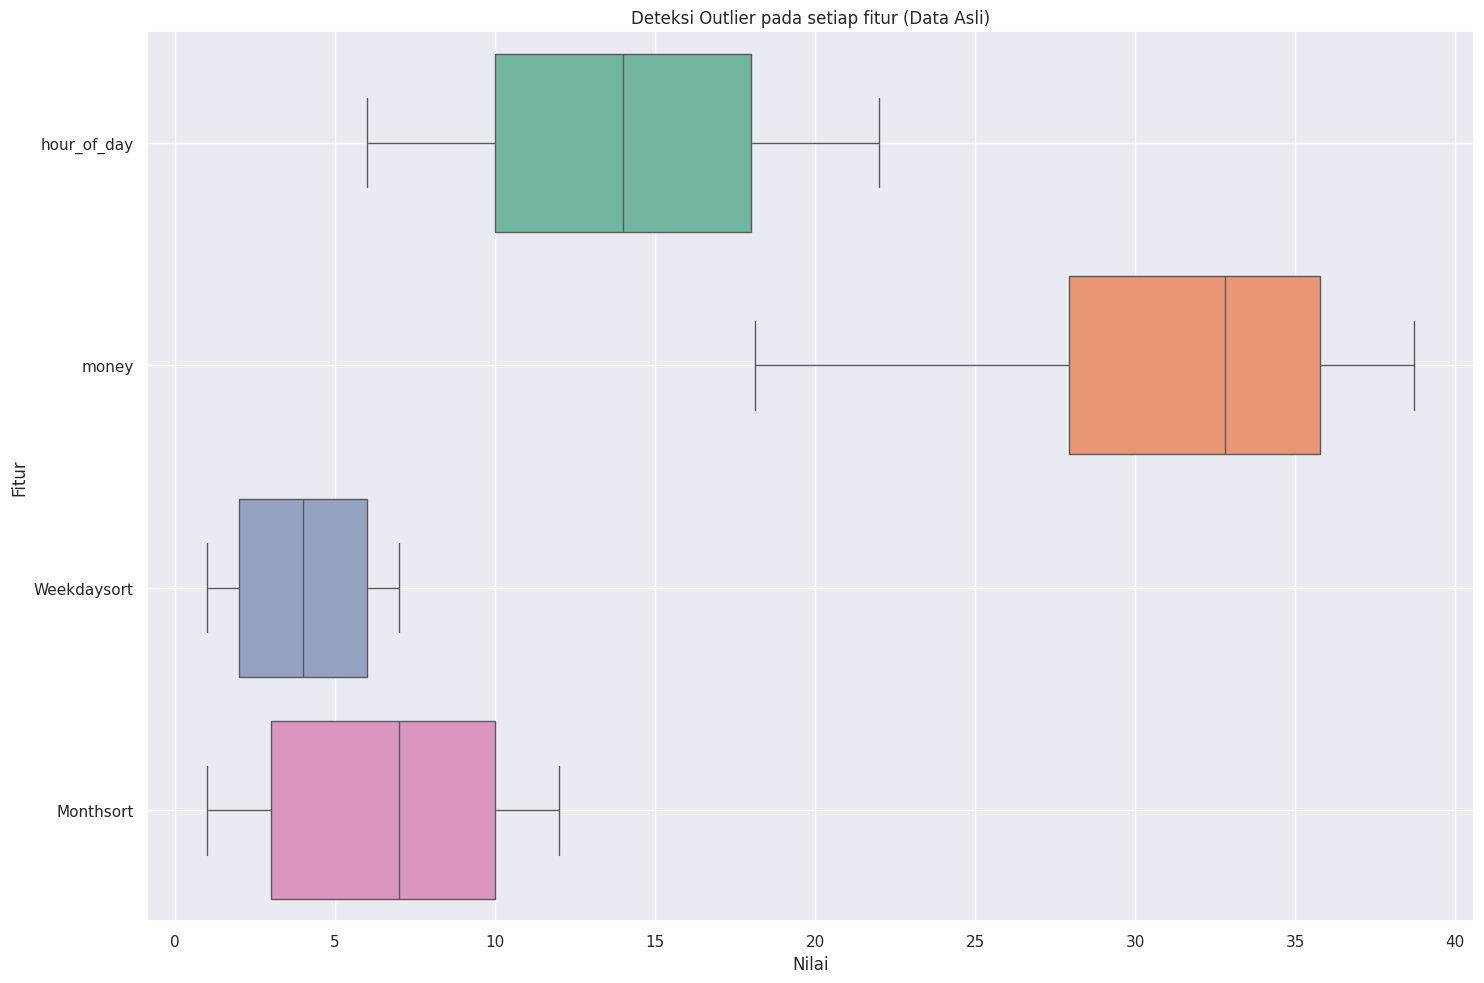

In [13]:
# ===========================
# OUTLIER
# ===========================

# Visualisasi Outlier (menggunakan data asli untuk deteksi awal)
print("\n=== Visualisasi Outlier (Sebelum Pembersihan) ===")

# Ambil semua kolom numerik dari df
numerik_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Buat figure besar agar semua boxplot muat
plt.figure(figsize=(15, 10))

# Plot semua boxplot secara horizontal
sns.boxplot(data=df[numerik_cols], orient="h", palette="Set2")

plt.title("Deteksi Outlier pada setiap fitur (Data Asli)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.grid(True)
plt.tight_layout()
plt.show()

# **3. DATA PREPOCESSING**

In [14]:
# ===========================
# PEMISAHAN TIPE DATA
# ===========================
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
obj_cols = df.select_dtypes(include=['object']).columns

print("\nKolom Numerik :", num_cols.tolist())
print("Kolom Object  :", obj_cols.tolist())


Kolom Numerik : ['hour_of_day', 'money', 'Weekdaysort', 'Monthsort']
Kolom Object  : ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Date', 'Time']


In [15]:
# Distribusi Frekuensi Kolom Kategorikal (tabel DataFrame)
print("\n=== Distribusi Frekuensi Kolom Kategorikal ===")

for col in obj_cols:
    freq_df = (
       df[col]
       .value_counts(dropna=False)
        .reset_index()
    )
    freq_df.columns = [col, 'Count']
    freq_df['Percentage'] = (freq_df['Count'] / len(df) * 100).round(2)

    display(freq_df)  # Akan menampilkan tabel rapi di Jupyter / Notebook



=== Distribusi Frekuensi Kolom Kategorikal ===


,cash_type,Count,Percentage
0,card,3547,100.0


,coffee_name,Count,Percentage
0,Americano with Milk,809,22.81
1,Latte,757,21.34
2,Americano,564,15.90
3,Cappuccino,486,13.70
4,Cortado,287,8.09
5,Hot Chocolate,276,7.78
6,Cocoa,239,6.74
7,Espresso,129,3.64


,Time_of_Day,Count,Percentage
0,Afternoon,1205,33.97
1,Morning,1181,33.30
2,Night,1161,32.73


,Weekday,Count,Percentage
0,Tue,572,16.13
1,Mon,544,15.34
2,Fri,532,15.00
3,Thu,510,14.38
4,Wed,500,14.10
5,Sat,470,13.25
6,Sun,419,11.81


,Month_name,Count,Percentage
0,Mar,494,13.93
1,Oct,426,12.01
2,Feb,423,11.93
3,Sep,344,9.70
4,Aug,272,7.67
5,Dec,259,7.30
6,Nov,259,7.30
7,May,241,6.79
8,Jul,237,6.68
9,Jun,223,6.29


,Date,Count,Percentage
0,2024-10-11,26,0.73
1,2025-02-03,25,0.70
2,2025-02-05,24,0.68
3,2024-09-22,24,0.68
4,2024-07-30,24,0.68
...,...,...,...
376,2024-11-24,1,0.03
377,2024-05-13,1,0.03
378,2025-01-06,1,0.03
379,2024-03-31,1,0.03


,Time,Count,Percentage
0,18:11:38.635000,1,0.03
1,10:15:50.520000,1,0.03
2,12:19:22.539000,1,0.03
3,12:20:18.089000,1,0.03
4,13:46:33.006000,1,0.03
...,...,...,...
3542,16:37:24.475000,1,0.03
3543,14:38:35.535000,1,0.03
3544,11:59:45.484000,1,0.03
3545,10:41:41.249000,1,0.03


In [16]:
# Skewness & Kurtosis
print("\n=== Skewness & Kurtosis (Numerik) ===")
for col in num_cols:
    skew_val = skew(df[col], nan_policy='omit')
    kurt_val = kurtosis(df[col], nan_policy='omit')
    print(f"{col} -> Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}")


=== Skewness & Kurtosis (Numerik) ===
hour_of_day -> Skewness: 0.12, Kurtosis: -1.13
money -> Skewness: -0.54, Kurtosis: -0.67
Weekdaysort -> Skewness: 0.08, Kurtosis: -1.22
Monthsort -> Skewness: 0.00, Kurtosis: -1.38


In [17]:
# ===========================
# IMPUTASI MISSING VALUES
# ===========================
df_clean = df.copy()

# Imputasi "Tidak Diketahui" untuk kolom object yang ditentukan
cols_to_fill_unknown = [] # Postal_Code is numerical, so it's removed from here
for col in cols_to_fill_unknown:
    if col in obj_cols and df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna("0", inplace=True)

# Imputasi 0 for Postal_Code (numerical)
if 'Postal_Code' in num_cols and df_clean['Postal_Code'].isnull().sum() > 0:
    df_clean['Postal_Code'].fillna(0, inplace=True)


# # Imputasi median untuk numerik (untuk kolom numerik lainnya)
# for col in num_cols:
#     if col not in cols_to_fill_unknown + ['Kode_RS'] and df_clean[col].isnull().sum() > 0:
#             df_clean[col].fillna(df_clean[col].median(), inplace=True)

# # Imputasi modus untuk object (untuk kolom object lainnya)
# for col in obj_cols:
#     if col not in cols_to_fill_unknown and df_clean[col].isnull().sum() > 0:
#             df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


print("\n=== Missing Values Setelah Imputasi ===")
print(df_clean.isnull().sum())

# Simpan hasil imputasi
df_clean.to_csv("dataset_after_imputation.csv", index=False)


=== Missing Values Setelah Imputasi ===
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [18]:
# ===========================
# CEK KEMBALI MISSING VALUE
# ===========================
# Missing values terbanyak
print("\n=== Missing Values (Urut Terbanyak) ===")
missing_percent = (df_clean.isnull().sum() / len(df)) * 100
missing_sorted = missing_percent[missing_percent > 0].sort_values(ascending=False)
print(missing_sorted)


=== Missing Values (Urut Terbanyak) ===
Series([], dtype: float64)


In [19]:
# ===========================
# HAPUS DUPLIKAT
# ===========================
df_outlier_cleaned = df_clean.copy()
print(f"\nJumlah duplikat: {df_outlier_cleaned.duplicated().sum()}")
df_outlier_cleaned.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah hapus duplikat: {df_outlier_cleaned.shape[0]}")


Jumlah duplikat: 0
Jumlah baris setelah hapus duplikat: 3547


In [20]:
# ===========================
# PENANGANAN OUTLIER DENGAN METODE IQR
# ===========================

# Kolom yang akan ditangani outlier-nya
outlier_cols = [' '] #Tidak ada indikasi outlier

# Buat salinan DataFrame untuk penanganan outlier
df_outlier_cleaned = df_clean.copy()

for col in outlier_cols:
    Q1 = df_outlier_cleaned[col].quantile(0.25)
    Q3 = df_outlier_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data untuk menghilangkan outlier
    df_outlier_cleaned = df_outlier_cleaned[
        (df_outlier_cleaned[col] >= lower_bound) &
        (df_outlier_cleaned[col] <= upper_bound)
    ]

    print(f"Jumlah baris setelah menghilangkan outlier di kolom {col}: {df_outlier_cleaned.shape[0]}")

print("\n=== Outlier Removal Selesai ===")


KeyError: 'Sales'

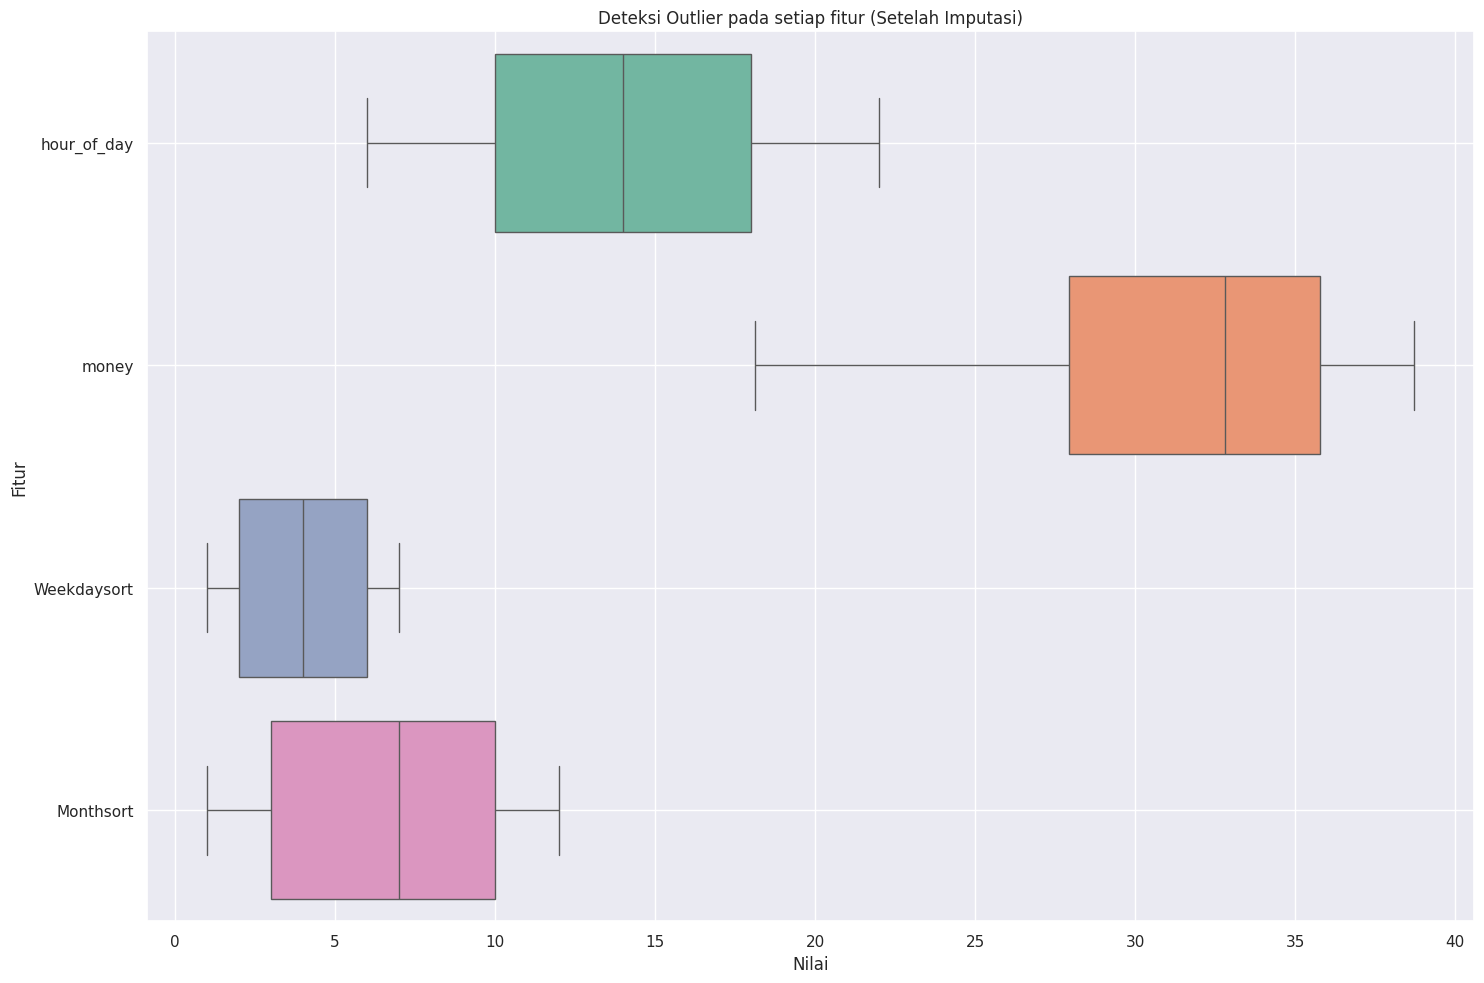

In [22]:
# ===========================
# VISUALISASI OUTLIER
# ===========================

# Ambil kolom numerik yang diinginkan dari df_clean (kecuali Kode_RS)
numerik_cols_clean = ['hour_of_day', 'money', 'Weekdaysort', 'Monthsort']

# Buat figure besar agar semua boxplot muat
plt.figure(figsize=(15, 10))

# Plot semua boxplot secara horizontal (orientasi agar lebih mudah dibaca)
sns.boxplot(data=df_outlier_cleaned[numerik_cols_clean], orient="h", palette="Set2")

plt.title("Deteksi Outlier pada setiap fitur (Setelah Imputasi)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# ===========================
# DESKRIPSI DATA SETELAH PENANGANAN OUTLIER
# ===========================
print("\n=== Statistik Deskriptif Setelah Penanganan Outlier ===")
display(df_outlier_cleaned.describe())


=== Statistik Deskriptif Setelah Penanganan Outlier ===


,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [24]:
# Simpan hasil outlier removal
df_outlier_cleaned.to_csv("dataset_after_outlier.csv", index=False)

# **4.VISUALISASI KORELASI**

## Melihat Korelasi Antar Fitur Numerik


=== Matriks Korelasi Fitur Numerik ===


,hour_of_day,money,Weekdaysort,Monthsort
hour_of_day,1.000000,0.202748,-0.002614,0.008293
money,0.202748,1.000000,-0.017264,-0.050043
Weekdaysort,-0.002614,-0.017264,1.000000,0.044141
Monthsort,0.008293,-0.050043,0.044141,1.000000


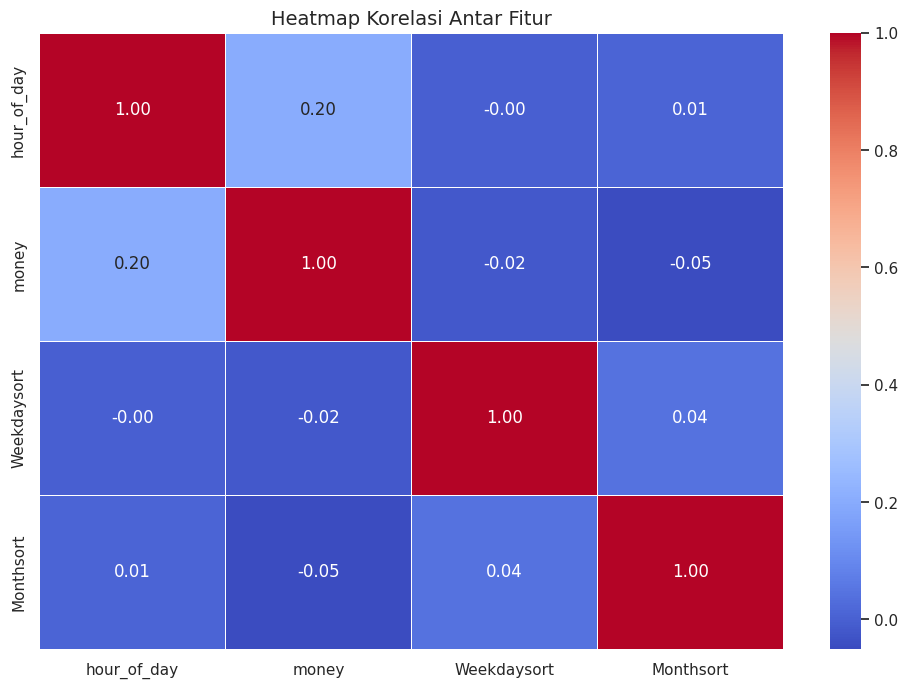

In [25]:
# Korelasi
correlation_matrix = df_outlier_cleaned[num_cols].corr()
print("\n=== Matriks Korelasi Fitur Numerik ===")
display(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur", fontsize=14)
plt.show()

## Pair Pot


=== Pairplot Antar Fitur Numerik ===


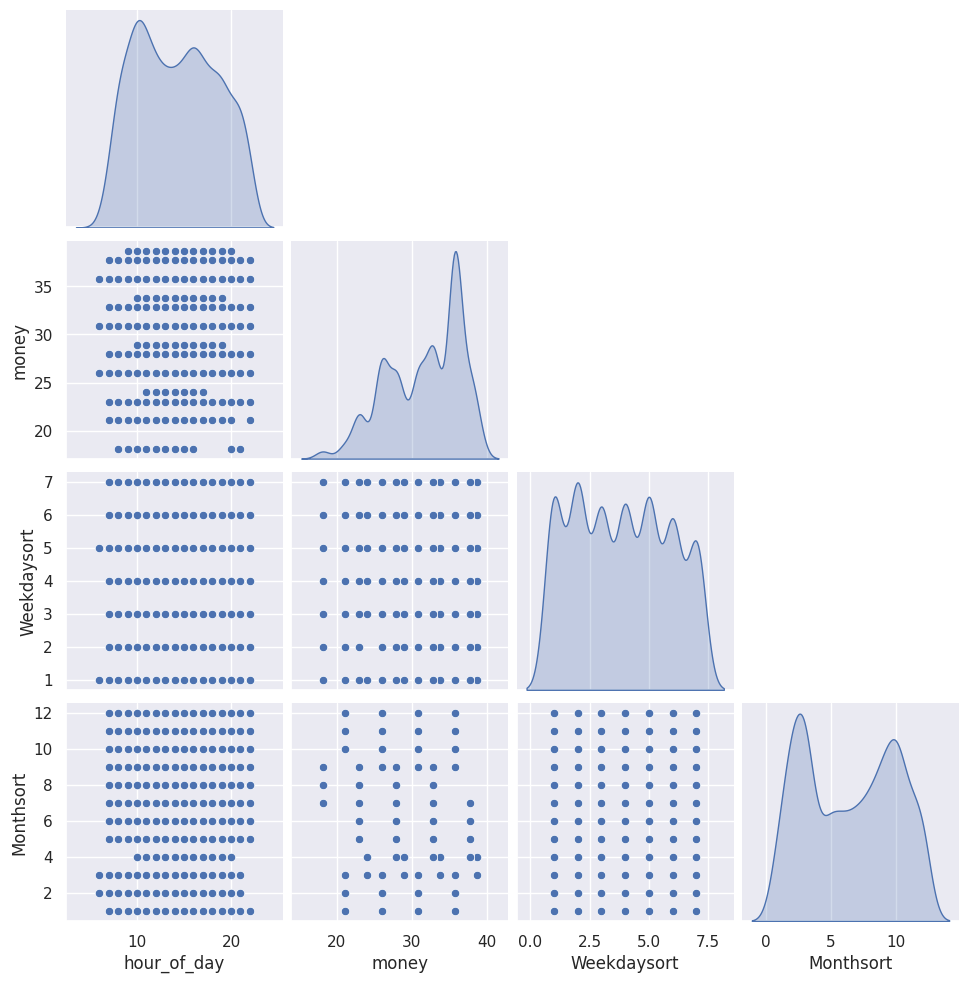

In [26]:
# Pairplot
print("\n=== Pairplot Antar Fitur Numerik ===")
sns.pairplot(df_outlier_cleaned[num_cols], diag_kind='kde', corner=True)
plt.show()


=== Distribusi Fitur Utama ===


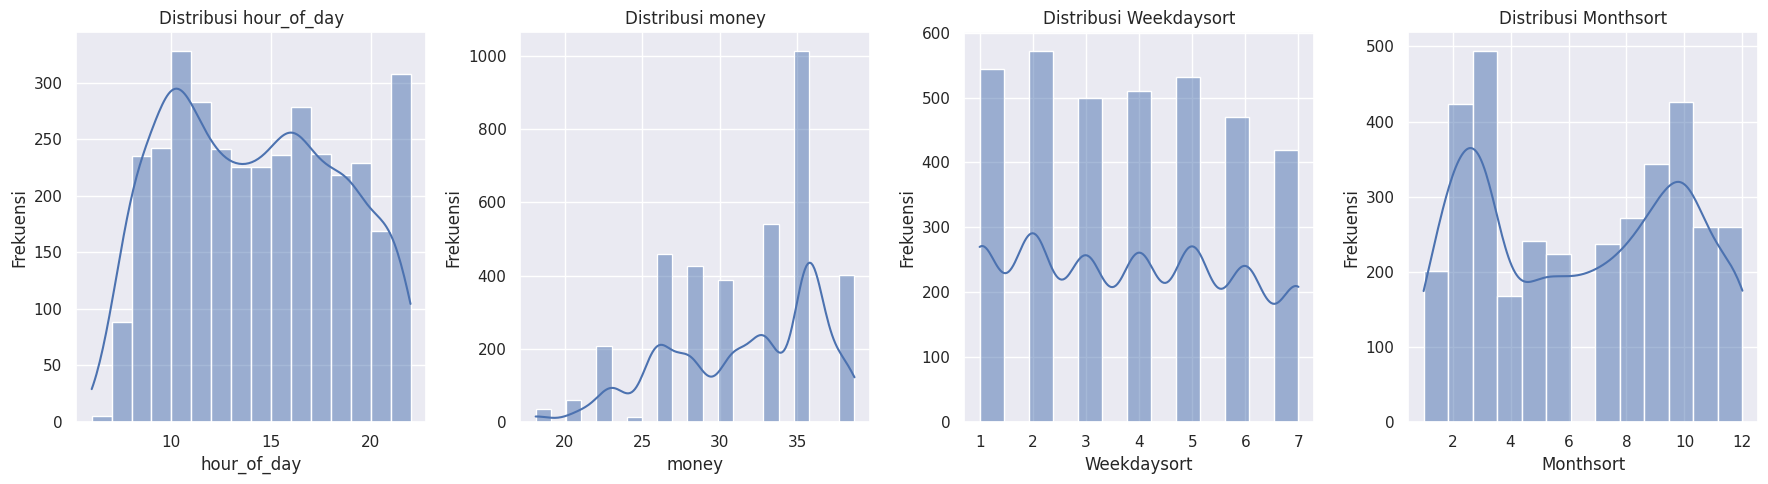


=== Money Distribution Based on Time of Day ===


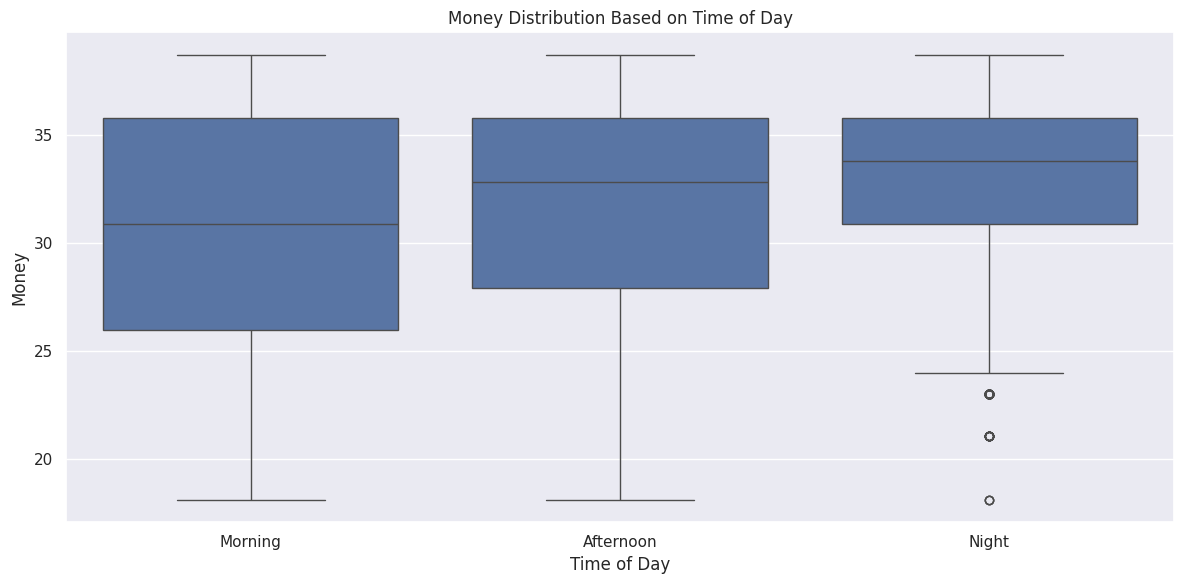

In [29]:
# ===========================
# EKSPLORASI FITUR UTAMA
# ===========================

# Visualisasi distribusi fitur numerik utama
main_numeric_features = ['hour_of_day', 'money', 'Weekdaysort', 'Monthsort']

print("\n=== Distribusi Fitur Utama ===")

plt.figure(figsize=(18, 5))
for i, col in enumerate(main_numeric_features):
    plt.subplot(1, 4, i + 1)
    sns.histplot(data=df_outlier_cleaned, x=col, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# Anda juga bisa mengeksplorasi hubungan fitur utama dengan kolom kategorikal,
# contoh: Total_Tempat_Tidur berdasarkan Jenis_RS atau Kelas_RS.
# Berikut contoh untuk Jenis_RS:

print("\n=== Money Distribution Based on Time of Day ===")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_outlier_cleaned, x='Time_of_Day', y='money')
plt.xticks(rotation=0) # No rotation needed for few categories
plt.title('Money Distribution Based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Money')
plt.tight_layout()
plt.show()